# Part 1: Feature Engineering on Continuous or Numeric Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats

Raw Features

In [61]:
poke_df = pd.read_csv('../datasets/Pokemon.csv', encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [62]:
poke_df[['HP','Attack','Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [65]:
poke_df[['HP','Attack','Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


# Binarizer

from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=0.9)

pd_watched = bn.transform([popsong_df['listen_count']])[0]

popsong_df['pd_watched'] = pd_watched

popsong_df.head(11)

# Rounding

It often makes sense to round off these high precision percentages into numeric integers. These integers can then be directly used as raw values or even as categorical (discrete-class based) features. 

In [66]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


Let us use the above continuos feature for further pre-processing

# Polynomial Features

Build features up to 2nd degree by leveraging

In [11]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False,  include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [  100.,   123., 10000., 12300., 15129.],
       ...,
       [  101.,    53., 10201.,  5353.,  2809.],
       [  107.,   101., 11449., 10807., 10201.],
       [   95.,   115.,  9025., 10925., 13225.]])

# Interaction Features

In [67]:
intr_features = pd.DataFrame(res, columns=['Attack', 'Defense',  
                                           'Attack^2', 
                                           'Attack x Defense',  
                                           'Defense^2'])
intr_features.head(5)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,100.0,123.0,10000.0,12300.0,15129.0
3,52.0,43.0,2704.0,2236.0,1849.0
4,64.0,58.0,4096.0,3712.0,3364.0


# Binning

The problem of working with raw, continuous numeric features is that often the distribution of values in these features will be skewed. This signifies that some values will occur quite frequently while some will be quite rare. Besides this, there is also another problem of the varying range of values in any of these features. 

Binning, also known as quantization is used for transforming continuous numeric features into discrete ones (categories). These discrete values or numbers can be thought of as categories or bins into which the raw, continuous numeric values are binned or grouped into.

In [15]:
fcc_survey_df = pd.read_csv('../datasets/fcc_2016_coder_survey_subset.csv', 
encoding='utf-8')
fcc_survey_df[['Number', 'EmploymentField', 'Age', 'Income']].head()

,Number,EmploymentField,Age,Income
0,1,software development and IT,under 25,>120k
1,2,education,25-29,100k - 120k
2,3,"arts, media, sports",30-39,80k - 100k
3,4,office and admin support,40+,60k - 80k
4,5,sales,NaN,40k - 60k


bin_ranges = [0, 15, 30, 45, 60, 75, 100]

bin_names = [1, 2, 3, 4, 5, 6]

fcc_survey_df['Age_bin_custom_range'] = pd.cut(
                                           np.array(
                                              fcc_survey_df['Age']), 
                                              bins=bin_ranges)


fcc_survey_df['Age_bin_custom_label'] = pd.cut(
                                           np.array(
                                              fcc_survey_df['Age']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)

## Adaptive Binning

The drawback in using fixed-width binning is that due to us manually deciding the bin ranges, we can end up with irregular bins which are not uniform based on the number of data points or values which fall in each bin. Some of the bins might be densely populated and some of them might be sparsely populated or even empty! Adaptive binning is a safer strategy in these scenarios where we let the data speak for itself! That’s right, we use the data distribution itself to decide our bin ranges.

Quantile based binning is a good strategy to use for adaptive binning. Quantiles are specific values or cut-points which help in partitioning the continuous valued distribution of a specific numeric field into discrete contiguous bins or intervals. 

Thus, q-Quantiles help in partitioning a numeric attribute into q equal partitions. Popular examples of quantiles include the 2-Quantile known as the median which divides the data distribution into two equal bins, 4-Quantiles known as the quartiles which divide the data into 4 equal bins and 10-Quantiles also known as the deciles which create 10 equal width bins

quantile_list = [0, .25, .5, .75, 1.]

quantiles = fcc_survey_df['Income'].quantile(quantile_list)

# # Let’s now visualize these quantiles in the original distribution histogram!

fig, ax = plt.subplots()

fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)


for quantile in quantiles:

qvl = plt.axvline(quantile, color='r')


ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)

ax.set_xlabel('Developer Income', fontsize=12)

ax.set_ylabel('Frequency', fontsize=12)

### Understand pd.cut vs pdq.cut

pd.cut --> use 'bins'= for bins range.




pd.qcut --> use q= for quantile based bins

#### An important point to remember here is that the resultant outcome of binning leads to discrete valued categorical features and you might need an additional step of feature engineering on the categorical data before using it in any model

# _

# Statistical Transformations

##### Feature Engineering --> Transformation

##### statistical or mathematical transformations

Basically transformation is very important when the data is very much skewed. Or kind of scaling

### Log Transformation

Log transforms are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes.

In [21]:
"""

fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

"""

"\n\nfcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))\nfcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]\n\n"

### plt.axvline(income_log_mean, color='r') - This can be used to draw a vertical/horizontal mean or std in existing bins

# Box-Cox Transform

The Box-Cox transform is another popular function belonging to the power transform family of functions. This function has a pre-requisite that the numeric values to be transformed must be positive (similar to what log transform expects). In case they are negative, shifting using a constant value helps.

In [68]:
"""

income = np.array(fcc_survey_df['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

"""

"\n\nincome = np.array(fcc_survey_df['Income'])\nincome_clean = income[~np.isnan(income)]\nl, opt_lambda = spstats.boxcox(income_clean)\nprint('Optimal lambda value:', opt_lambda)\n\n"

In [69]:
"""

fcc_survey_df['Income_boxcox_lambda_0'] = spstats.boxcox( (1+fcc_survey_df['Income']), lmbda=0)
fcc_survey_df['Income_boxcox_lambda_opt'] = spstats.boxcox(fcc_survey_df['Income'], lmbda=opt_lambda)

fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log', 'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].iloc[4:9]


"""

"\n\nfcc_survey_df['Income_boxcox_lambda_0'] = spstats.boxcox( (1+fcc_survey_df['Income']), lmbda=0)\nfcc_survey_df['Income_boxcox_lambda_opt'] = spstats.boxcox(fcc_survey_df['Income'], lmbda=opt_lambda)\n\nfcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log', 'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].iloc[4:9]\n\n\n"

# Part 2: Feature Engineering on Categorical Data

In [71]:
vg_df = pd.read_csv('../datasets/vgsales.csv', encoding='utf-8')
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [72]:
genres = np.unique(vg_df['Genre'])
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

### Label Encoding 

In [73]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
genre_labels = gle.fit_transform(vg_df['Genre'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

{0: 'Action',
 1: 'Adventure',
 2: 'Fighting',
 3: 'Misc',
 4: 'Platform',
 5: 'Puzzle',
 6: 'Racing',
 7: 'Role-Playing',
 8: 'Shooter',
 9: 'Simulation',
 10: 'Sports',
 11: 'Strategy'}

In [74]:
vg_df['GenreLabel'] = genre_labels
vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

,Name,Platform,Year,Genre,GenreLabel
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7
5,Tetris,GB,1989.0,Puzzle,5
6,New Super Mario Bros.,DS,2006.0,Platform,4


###### These labels can be used directly often especially with frameworks like scikit-learn if you plan to use them as response variables for prediction, however as discussed earlier, we will need an additional step of encoding on these before we can use them as features.

### Transforming Ordinal Attributes

Ordinal attributes are categorical attributes with a sense of order amongst the values. Let’s consider our Pokémon dataset which we used in Part 1 of this series. Let’s focus more specifically on the Generation attribute.

In [78]:
poke_df = pd.read_csv('../datasets/Pokemon.csv', encoding='utf-8')
poke_df = poke_df.sample(random_state=1, 
                         frac=1).reset_index(drop=True)
poke_df['Generation'] = ['Gen ' + str(col)  for col in poke_df['Generation']]
print(poke_df['Generation'])
np.unique(poke_df['Generation'])

0      Gen 1
1      Gen 4
2      Gen 2
3      Gen 6
4      Gen 2
       ...  
795    Gen 5
796    Gen 6
797    Gen 1
798    Gen 2
799    Gen 1
Name: Generation, Length: 800, dtype: object


array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)

In [79]:
poke_df.head()
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    object
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(4)
memory usage: 75.9+ KB


they have a sense of order amongst them. In general, there is no generic module or function to map and transform these features into numeric representations based on order automatically. Hence we can use a custom encoding\mapping scheme.

### Custom Encoding

.map() --> Helps to transforming the ordinal feature

In [82]:
gen_ord_map = {'Gen 1': 1, 'Gen 2': 2, 'Gen 3': 3, 
               'Gen 4': 4, 'Gen 5': 5, 'Gen 6': 6, 'Gen 7': 7}


poke_df['GenerationLabel_'] = poke_df['Generation'].map(gen_ord_map)
poke_df[['Name', 'Generation', 'GenerationLabel_']].iloc[4:10]

,Name,Generation,GenerationLabel_
4,Octillery,Gen 2,2
5,Helioptile,Gen 6,6
6,Dialga,Gen 4,4
7,DeoxysDefense Forme,Gen 3,3
8,Rapidash,Gen 1,1
9,Swanna,Gen 5,5


#### Encoding Categorical Attributes

Typical Encoding --> Transformation on ordinal/categorical feature --> Encoding

Challenge with jus transformation is:

a) It is just  numeric representation.

b) It would consider it to be a continuous numeric feature thinking value 10 (Sports) is greater than 6 (Racing) but that is meaningless because the Sports genre is certainly not bigger or smaller than Racing, these are essentially different values or categories which cannot be compared directly. 

Hence we need an additional layer of encoding schemes where dummy features are created for each unique value or category out of all the distinct categories per attribute.

#### One-hot Encoding Scheme

Considering we have the numeric representation of any categorical attribute with m labels (after transformation), the one-hot encoding scheme, encodes or transforms the attribute into m binary features which can only contain a value of 1 or 0. 

In [83]:
poke_df[['Name', 'Generation', 'Legendary']].iloc[4:10]

,Name,Generation,Legendary
4,Octillery,Gen 2,False
5,Helioptile,Gen 6,False
6,Dialga,Gen 4,True
7,DeoxysDefense Forme,Gen 3,True
8,Rapidash,Gen 1,False
9,Swanna,Gen 5,False


In [84]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 800 non-null    int64 
 1   Name              800 non-null    object
 2   Type 1            800 non-null    object
 3   Type 2            414 non-null    object
 4   Total             800 non-null    int64 
 5   HP                800 non-null    int64 
 6   Attack            800 non-null    int64 
 7   Defense           800 non-null    int64 
 8   Sp. Atk           800 non-null    int64 
 9   Sp. Def           800 non-null    int64 
 10  Speed             800 non-null    int64 
 11  Generation        800 non-null    object
 12  Legendary         800 non-null    bool  
 13  GenerationLabel_  800 non-null    int64 
dtypes: bool(1), int64(9), object(4)
memory usage: 82.2+ KB


In [85]:
np.unique(poke_df['Legendary'])

array([False,  True])

In [86]:
#legend_map = {1:'True', 2:'False'}

#poke_df['is_legendary_'] = poke_df['is_legendary'].map(legend_map)
#poke_df['is_legendary_']

In [87]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# transform and map pokemon generations
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(poke_df['Generation'])
poke_df['Gen_Label'] = gen_labels

# transform and map pokemon legendary status
leg_le = LabelEncoder()
leg_labels = leg_le.fit_transform(poke_df['Legendary'])
poke_df['Lgnd_Label'] = leg_labels
poke_df_sub = poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]
poke_df_sub.iloc[4:10]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
4,Octillery,Gen 2,1,False,0
5,Helioptile,Gen 6,5,False,0
6,Dialga,Gen 4,3,True,1
7,DeoxysDefense Forme,Gen 3,2,True,1
8,Rapidash,Gen 1,0,False,0
9,Swanna,Gen 5,4,False,0


In [90]:
# encode generation labels using one-hot encoding scheme
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(poke_df[['Gen_Label']]).toarray()

gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)
print(gen_features)

# encode legendary status labels using one-hot encoding scheme
leg_ohe = OneHotEncoder()
leg_feature_arr = leg_ohe.fit_transform(poke_df[['Lgnd_Label']]).toarray()
leg_feature_labels = ['Legendary_'+str(cls_label) for cls_label in leg_le.classes_]
leg_features = pd.DataFrame(leg_feature_arr, columns=leg_feature_labels)
print(leg_features)

     Gen 1  Gen 2  Gen 3  Gen 4  Gen 5  Gen 6
0      1.0    0.0    0.0    0.0    0.0    0.0
1      0.0    0.0    0.0    1.0    0.0    0.0
2      0.0    1.0    0.0    0.0    0.0    0.0
3      0.0    0.0    0.0    0.0    0.0    1.0
4      0.0    1.0    0.0    0.0    0.0    0.0
..     ...    ...    ...    ...    ...    ...
795    0.0    0.0    0.0    0.0    1.0    0.0
796    0.0    0.0    0.0    0.0    0.0    1.0
797    1.0    0.0    0.0    0.0    0.0    0.0
798    0.0    1.0    0.0    0.0    0.0    0.0
799    1.0    0.0    0.0    0.0    0.0    0.0

[800 rows x 6 columns]
     Legendary_False  Legendary_True
0                1.0             0.0
1                1.0             0.0
2                1.0             0.0
3                1.0             0.0
4                1.0             0.0
..               ...             ...
795              1.0             0.0
796              1.0             0.0
797              1.0             0.0
798              1.0             0.0
799              

In [91]:
poke_df_ohe = pd.concat([poke_df_sub, gen_features, leg_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'],   
               gen_feature_labels, ['Legendary', 'Lgnd_Label'], 
               leg_feature_labels], [])
poke_df_ohe[columns].iloc[4:10]

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
4,Octillery,Gen 2,1,0.0,1.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
5,Helioptile,Gen 6,5,0.0,0.0,0.0,0.0,0.0,1.0,False,0,1.0,0.0
6,Dialga,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,True,1,0.0,1.0
7,DeoxysDefense Forme,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
8,Rapidash,Gen 1,0,1.0,0.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
9,Swanna,Gen 5,4,0.0,0.0,0.0,0.0,1.0,0.0,False,0,1.0,0.0


In [92]:
new_poke_df = pd.DataFrame([['PikaZoom', 'Gen 3', True], 
                           ['CharMyToast', 'Gen 4', False]],
                       columns=['Name', 'Generation', 'Legendary'])
new_poke_df

,Name,Generation,Legendary
0,PikaZoom,Gen 3,True
1,CharMyToast,Gen 4,False


In [93]:
new_gen_labels = gen_le.transform(new_poke_df['Generation'])
new_poke_df['Gen_Label'] = new_gen_labels
new_leg_labels = leg_le.transform(new_poke_df['Legendary'])
new_poke_df['Lgnd_Label'] = new_leg_labels
new_poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
0,PikaZoom,Gen 3,2,True,1
1,CharMyToast,Gen 4,3,False,0


In [96]:
new_gen_feature_arr = gen_ohe.transform(new_poke_df[['Gen_Label']]).toarray()
new_gen_features = pd.DataFrame(new_gen_feature_arr, 
                                columns=gen_feature_labels)

# encode legendary status labels using one-hot encoding scheme

new_leg_feature_arr = leg_ohe.transform(new_poke_df[['Lgnd_Label']]).toarray()
new_leg_feature_labels = ['Legendary_'+str(cls_label) for cls_label in leg_le.classes_]
new_leg_features = pd.DataFrame(new_leg_feature_arr, columns=leg_feature_labels)
print(new_leg_features)

   Legendary_False  Legendary_True
0              0.0             1.0
1              1.0             0.0


In [97]:
new_poke_ohe = pd.concat([new_poke_df, new_gen_features, new_leg_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'], 
               gen_feature_labels,
               ['Legendary', 'Lgnd_Label'], leg_feature_labels], [])
new_poke_ohe[columns]

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
0,PikaZoom,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
1,CharMyToast,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,False,0,1.0,0.0


#### You can also apply the one-hot encoding scheme easily by leveraging the to_dummies(…) function from pandas.

In [98]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
pd.concat([poke_df[['Name', 'Generation']], gen_onehot_features], 
           axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,0,1,0,0,0,0
5,Helioptile,Gen 6,0,0,0,0,0,1
6,Dialga,Gen 4,0,0,0,1,0,0
7,DeoxysDefense Forme,Gen 3,0,0,1,0,0,0
8,Rapidash,Gen 1,1,0,0,0,0,0
9,Swanna,Gen 5,0,0,0,0,1,0


Therefore, instead of LabelEncode --> OneHot encoder, directly use pd.get_dummies()

#### Dropping First Genre

In [99]:
gen_dummy_features = pd.get_dummies(poke_df['Generation'], 
                                    drop_first=True)
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features], 
          axis=1).iloc[4:10]

,Name,Generation,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,1,0,0,0,0
5,Helioptile,Gen 6,0,0,0,0,1
6,Dialga,Gen 4,0,0,1,0,0
7,DeoxysDefense Forme,Gen 3,0,1,0,0,0
8,Rapidash,Gen 1,0,0,0,0,0
9,Swanna,Gen 5,0,0,0,1,0


In [100]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
gen_dummy_features = gen_onehot_features.iloc[:,:-1]
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features],  
          axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
4,Octillery,Gen 2,0,1,0,0,0
5,Helioptile,Gen 6,0,0,0,0,0
6,Dialga,Gen 4,0,0,0,1,0
7,DeoxysDefense Forme,Gen 3,0,0,1,0,0
8,Rapidash,Gen 1,1,0,0,0,0
9,Swanna,Gen 5,0,0,0,0,1


IMPORTANT: When dopping Gen 1 or Gen 6 using drop_first or drop_last respectively, record with Gen 1 or Gen 6 will have all zeroes at row wise.

#### Effect Coding Scheme

The effect coding scheme is actually very similar to the dummy coding scheme, except during the encoding process, the encoded features or feature vector, for the category values which represent all 0 in the dummy coding scheme, is replaced by -1 in the effect coding scheme

In [101]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
gen_effect_features = gen_onehot_features.iloc[:,:-1]
gen_effect_features.loc[np.all(gen_effect_features == 0, 
                               axis=1)] = -1.
pd.concat([poke_df[['Name', 'Generation']], gen_effect_features], 
          axis=1).iloc[4:10]

C:\Users\sujau\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
4,Octillery,Gen 2,0.0,1.0,0.0,0.0,0.0
5,Helioptile,Gen 6,-1.0,-1.0,-1.0,-1.0,-1.0
6,Dialga,Gen 4,0.0,0.0,0.0,1.0,0.0
7,DeoxysDefense Forme,Gen 3,0.0,0.0,1.0,0.0,0.0
8,Rapidash,Gen 1,1.0,0.0,0.0,0.0,0.0
9,Swanna,Gen 5,0.0,0.0,0.0,0.0,1.0


The above output clearly shows that the Pokémon belonging to Generation 6 are now represented by a vector of -1 values as compared to zeros in dummy coding.

#### Bin-counting Scheme

The encoding schemes we discussed so far, work quite well on categorical data in general, but they start causing problems when the number of distinct categories in any feature becomes very large. Essential for any categorical feature of m distinct labels, you get m separate features.

Also causes of 'Curse of dimensionality' issue

###### The bin-counting scheme is a useful scheme for dealing with categorical variables having many categories. In this scheme, instead of using the actual label values for encoding, we use probability based statistical information about the value and the actual target or response value which we aim to predict in our modeling efforts.

### Feature Hashing Scheme

A hash function maps a large number of values into a small finite set of values, so multiple different values might create the same hash which is termed as collisions.

Typically, a signed hash function is used so that the sign of the value obtained from the hash is used as the sign of the value which is stored in the final feature vector at the appropriate index. This should ensure lesser collisions and lesser accumulation of error due to collisions.

Hashing schemes work on strings, numbers and other structures like vectors. 

It has binning system, thus even if we have over 1000 distinct categories in a feature and we set b=10 as the final feature vector size, the output feature set will still have only 10 features as compared to 1000 binary features if we used a one-hot encoding scheme

In [102]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(vg_df['Genre'])
hashed_features = hashed_features.toarray()
pd.concat([vg_df[['Name', 'Genre']], pd.DataFrame(hashed_features)], 
          axis=1).iloc[1:7]

,Name,Genre,0,1,2,3,4,5
1,Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0
2,Mario Kart Wii,Racing,-1.0,0.0,0.0,0.0,0.0,-1.0
3,Wii Sports Resort,Sports,-2.0,2.0,0.0,-2.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,Role-Playing,-1.0,1.0,2.0,0.0,1.0,-1.0
5,Tetris,Puzzle,0.0,1.0,1.0,-2.0,1.0,-1.0
6,New Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0


# Part 3: Feature Engineering on unstructured data

In [103]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

In [104]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


### Text pre-processing

There can be multiple ways of cleaning and pre-processing textual data. In the following points, we highlight some of the most important ones which are used heavily in Natural Language Processing (NLP) pipelines.

#### Removing tags:

Our text often contains unnecessary content like HTML tags, which do not add much value when analyzing text. The BeautifulSoup library does an excellent job in providing necessary functions for this.

#### Removing accented characters:

In any text corpus, especially if you are dealing with the English language, often you might be dealing with accented characters\letters. Hence we need to make sure that these characters are converted and standardized into ASCII characters. A simple example would be converting é to e

#### Expanding contractions:

In the English language, contractions are basically shortened versions of words or syllables. These shortened versions of existing words or phrases are created by removing specific letters and sounds. Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form often helps with text standardization.

 ##### Removing special characters:

Special characters and symbols which are usually non alphanumeric characters often add to the extra noise in unstructured text. More than often, simple regular expressions (regexes) can be used to achieve this.

##### Stemming and lemmatization:

Word stems are usually the base form of possible words that can be created by attaching affixes like prefixes and suffixes to the stem to create new words. This is known as inflection. The reverse process of obtaining the base form of a word is known as stemming. A simple example are the words WATCHES, WATCHING, and WATCHED. They have the word root stem WATCH as the base form. Lemmatization is very similar to stemming, where we remove word affixes to get to the base form of a word. However the base form in this case is known as the root word but not the root stem. The difference being that the root word is always a lexicographically correct word (present in the dictionary) but the root stem may not be so.

##### Removing stopwords:

Words which have little or no significance especially when constructing meaningful features from text are known as stopwords or stop words. These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. Words like a, an, the, and so on are considered to be stopwords. There is no universal stopword list but we use a standard English language stopwords list from nltk. You can also add your own domain specific stopwords as needed.

Other standard operations:
Tokenization, 
removing extra whitespaces,
text lower casing

More advanced operations:
Spelling corrections,
grammatical error corrections,
removing repeated characters,
etc.

##### Build Stopwords pipeline (nltk.WordPunctTokenizer() & stopwords)

In [114]:
import nltk
nltk.download('stopwords')
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
normalize_corpus

In [115]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

##### Bag of Words Model  (CountVectorizer)

This is perhaps the most simple vector space representational model for unstructured text.

A vector space model is simply a mathematical model to represent unstructured text (or any other data) as numeric vectors, such that each dimension of the vector is a specific feature\attribute. 

The bag of words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0) or even weighted values.

The model’s name is such because each document is represented literally as a ‘bag’ of its own words, disregarding word orders, sequences and grammar.

In [116]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)

To understand further, display it with feature names from the corpus

In [117]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


#### Bag of N-Grams Model

A word is just a single token, often known as a unigram or 1-gram.

To take into account phrases or collection of words which occur in a sequence --> Use n gram model.

In [124]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(3,3))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs toast,blue beautiful sky,blue dog lazy,blue sky beautiful,breakfast sausages ham,brown fox jumps,brown fox quick,dog lazy brown,eggs ham sausages,eggs toast beans,...,kings breakfast sausages,lazy brown fox,love blue beautiful,love green eggs,quick blue dog,quick brown fox,sausages ham bacon,sky beautiful today,sky blue beautiful,sky blue sky
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [125]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


##### TF-IDF Model  (TfidfVectorizer)

###### term frequency (tf) and inverse document frequency (idf)

There are some potential problems which might arise with the Bag of Words model when it is used on large corpora. Since the feature vectors are based on absolute term frequencies, there might be some terms which occur frequently across all documents and these may tend to overshadow other terms in the feature set. The TF-IDF model tries to combat this issue by using a scaling or normalizing factor in its computation.

This technique was developed for ranking results for queries in search engines and now it is an indispensable model in the world of information retrieval and NLP.

tfidf(w, D) is the TF-IDF score for word w in document D.

The term tf(w, D) represents the term frequency of the word w in document D, which can be obtained from the Bag of Words model.

The term idf(w, D) is the inverse document frequency for the term w, which can be computed as the log transform of the total number of documents in the corpus C divided by the document frequency of the word w, which is basically the frequency of documents in the corpus where the word w occurs.

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


Aashik's understanding: Bag of words -->0, 1; TFIDF --> with weightage based on term frequency and document frequency

##### Document Similarity

Document similarity is the process of using a distance or similarity based metric that can be used to identify how similar a text document is with any other document(s) based on features extracted from the documents like bag of words or tf-idf.

There are several similarity and distance metrics that are used to compute document similarity.

These include cosine distance/similarity, euclidean distance, manhattan distance, BM25 similarity, jaccard distance and so on

##### Cosine Simlarity

In [128]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


Cosine similarity basically gives us a metric representing the cosine of the angle between the feature vector representations of two text documents. Lower the angle between the documents, the closer and more similar they are as depicted in the following figure.

 This must indicate these similar documents have some similar features. This is a perfect example of grouping or clustering that can be solved by unsupervised learning especially when you are dealing with huge corpora of millions of text documents.

##### Document Clustering with Similarity Features

Clustering leverages unsupervised learning to group data points (documents in this scenario) into groups or clusters. We will be leveraging an unsupervised hierarchical clustering algorithm here to try and group similar documents from our toy corpus together by leveraging the document similarity features we generated earlier.

##### Two types hierarchical clustering algorithms: agglomerative and divisive methods

Agglomerative clustering algorithm, which is hierarchical clustering using a bottom up approach i.e. each observation or document starts in its own cluster and clusters are successively merged together using a distance metric which measures distances between data points and a linkage merge criterion. 

https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41

The selection of the linkage criterion governs the merge strategy. Some examples of linkage criteria are Ward, Complete linkage, Average linkage and so on. 


Linkage comes into play!

In [130]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


4 elements: 2 elements--> Either Data Point identifiers or cluster labels, 1 element ---> cluster distance b/w 2 elements, 1 element --> cluster size (total # of elements in the cluster)

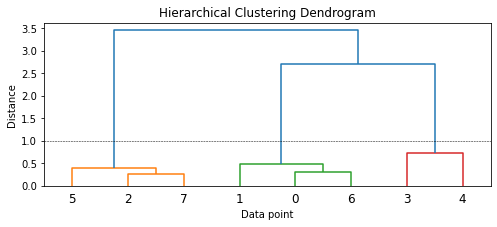

In [131]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

linkage -->Document clustering using the similarity scores. Remeber abt Dendogram concept.

Here notice the line at Distance=1. Will use it when finding the class labels

Leveraging this distance, we get our cluster labels.

In [134]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


Hurray! We have identifed the class labels using TFIDF-->Cosine SImlarity--> dendogram, linkage, as similar as 'Category'

### Topic Models

The idea of topic models revolves around the process of extracting key themes or concepts from a corpus of documents which are represented as topics.

Each topic can be represented as a bag or collection of words/terms from the document corpus.

#### Latent Dirichlet Allocation (LDA)

Uses a generative probabilistic model where each document consists of a combination of several topics and each term or word can be assigned to a specific topic. This is similar to pLSI based model (probabilistic LSI). Each latent topic contains a Dirichlet prior over them in the case of LDA.

A document-topic matrix, which would be the feature matrix we
are looking for.

A topic-term matrix, which helps us in looking at potential topics in the corpus.

In [137]:
from sklearn.decomposition import LatentDirichletAllocation

#lda = LatentDirichletAllocation(n_topics=3, max_iter=10000, random_state=0)
lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)

dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

,T1,T2,T3
0,0.832191,0.083480,0.084329
1,0.863554,0.069100,0.067346
2,0.047794,0.047776,0.904430
3,0.037243,0.925559,0.037198
4,0.049121,0.903076,0.047802
5,0.054902,0.047778,0.897321
6,0.888287,0.055697,0.056016
7,0.055704,0.055689,0.888607


You can clearly see which documents contribute the most to which of the three topics in the above output. You can view the topics and their main constituents as follows.

In [138]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('sky', 4.3324394424701325), ('blue', 3.373774254787669), ('beautiful', 3.3323650509884386), ('today', 1.3325579855138987), ('love', 1.330415818217548)]

[('bacon', 2.33269586574902), ('eggs', 2.33269586574902), ('ham', 2.33269586574902), ('sausages', 2.33269586574902), ('love', 1.3354610533796558), ('beans', 1.3327735190105536), ('breakfast', 1.3327735190105536), ('kings', 1.3327735190105536), ('toast', 1.3327735190105536), ('green', 1.3325431515674175)]

[('brown', 3.3323473548404405), ('dog', 3.3323473548404405), ('fox', 3.3323473548404405), ('lazy', 3.3323473548404405), ('quick', 3.3323473548404405), ('jumps', 1.3324193772908193), ('blue', 1.2919423137963386)]



#### Document Clustering with Topic Model Features

We used our Bag of Words model based features to build out topic model based features using LDA. We can now actually leverage the document term matrix we obtained and use an unsupervised clustering algorithm to try and group our documents similar to what we did earlier with our similarity features

In [139]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,1
1,Love this blue and beautiful sky!,weather,1
2,The quick brown fox jumps over the lazy dog.,animals,2
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,2
6,The sky is very blue and the sky is very beautiful today,weather,1
7,The dog is lazy but the brown fox is quick!,animals,2
